In [1]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer

# Display setting for exploration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Check out if the environment is the correct Anaconda one
import sys
print('environment: ',sys.executable)

# Set up directory to be the github repository
# requires git
import os
import subprocess
os.getcwd()
output = subprocess.check_output(['git', 'rev-parse', '--show-toplevel'])
path = output.decode('utf-8').strip()
print('working directory: ',path)
os.chdir(path)


environment:  c:\Users\ricca\anaconda3\envs\Thesis\python.exe
working directory:  C:/Users/ricca/Documents/GitHub/Thesis-SEM-ML


In [3]:
df = pd.read_csv("data\\processed\\factordatasets\\CFAcompletedf.csv")
df.drop(columns=['ID', 'SurveyCombination_M1','SurveyCombination_M2', 'Country', 'age','gender_recoded'], inplace=True)
display(df)

,telework,wp_size,private_sector,seniority,part_time,empl_contract,repetitive_movements,asb_verbal,asb_unwanted_sexatt,asb_violence_harassment,discrimination,emot_disturb,night,usual_hours_week,shortnotice,able_hour_off,undesirable_change,losejob,training_employer,training_onthejob,learning_new_things,work_welldone,usefull_work,predict_earnings,ProfessionalSupport,JobOverload,Environmentalrisks,WorkAgency,WHO5,WorkEngagement
0,4,4.0,1.0,3.0,2.0,6.0,NaN,NaN,NaN,NaN,2.0,1.0,1,40.0,5.0,4.0,3.0,2.0,1.0,2.0,5,4.0,3.0,3.0,-0.544562,-0.134975,0.092709,-0.208902,-0.495111,-0.299624
1,2,4.0,1.0,NaN,2.0,6.0,NaN,NaN,NaN,NaN,2.0,1.0,4,39.0,5.0,4.0,2.0,1.0,2.0,2.0,3,5.0,5.0,2.0,0.072902,-0.653761,0.304418,-0.262799,0.072606,-0.233544
2,1,4.0,1.0,22.0,2.0,6.0,1.0,2.0,2.0,2.0,NaN,3.0,1,50.0,5.0,2.0,NaN,1.0,NaN,NaN,4,4.0,NaN,2.0,-0.713265,0.433717,0.234393,-0.680849,-0.507107,-0.338656
3,6,NaN,1.0,3.0,2.0,6.0,NaN,NaN,NaN,NaN,2.0,2.0,4,60.0,5.0,4.0,1.0,2.0,2.0,2.0,4,3.0,4.0,3.0,-0.123809,-0.234958,0.333408,-0.355334,-0.007128,-0.423883
4,1,5.0,1.0,NaN,2.0,5.0,3.0,2.0,2.0,2.0,2.0,1.0,1,40.0,NaN,3.0,NaN,3.0,2.0,1.0,3,4.0,5.0,1.0,-0.111323,-0.733628,0.097448,-1.022732,0.601943,-0.121869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1,NaN,2.0,NaN,1.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,1,10.0,NaN,3.0,3.0,1.0,1.0,1.0,5,5.0,5.0,1.0,0.563523,-0.350281,-0.021960,-0.024825,1.273286,1.218226
1188,1,5.0,1.0,25.0,2.0,6.0,NaN,NaN,NaN,NaN,2.0,1.0,1,40.0,5.0,3.0,2.0,1.0,2.0,2.0,5,3.0,5.0,2.0,0.138425,-0.786595,-0.351485,-0.280896,0.521360,0.725973
1189,2,4.0,1.0,8.0,2.0,6.0,5.0,2.0,2.0,2.0,2.0,1.0,1,40.0,5.0,4.0,NaN,5.0,NaN,NaN,5,4.0,NaN,1.0,0.124769,-0.706349,-0.767793,1.109765,0.834505,0.592679
1190,6,2.0,1.0,5.0,2.0,5.0,NaN,NaN,NaN,NaN,2.0,3.0,2,40.0,4.0,3.0,1.0,2.0,2.0,2.0,5,4.0,4.0,2.0,-0.400564,0.758185,-0.198142,0.163386,-0.888197,-0.390176


In [4]:
def median_impute(df):
    """
    Impute missing values using the median strategy.

    Parameters:
        df (pandas.DataFrame): The input DataFrame with missing values.

    Returns:
        pandas.DataFrame: The imputed DataFrame.
    """
    
    # Create an imputer object with a median filling strategy
    imputer = SimpleImputer(strategy='median')

    # Apply the imputer to our data
    imputed_df = pd.DataFrame(imputer.fit_transform(df))

    # Restore original column names and index
    imputed_df.columns = df.columns
    imputed_df.index = df.index

    # Return the imputed DataFrame
    return imputed_df

# Apply the imputer to our data
imputed_df = median_impute(df)


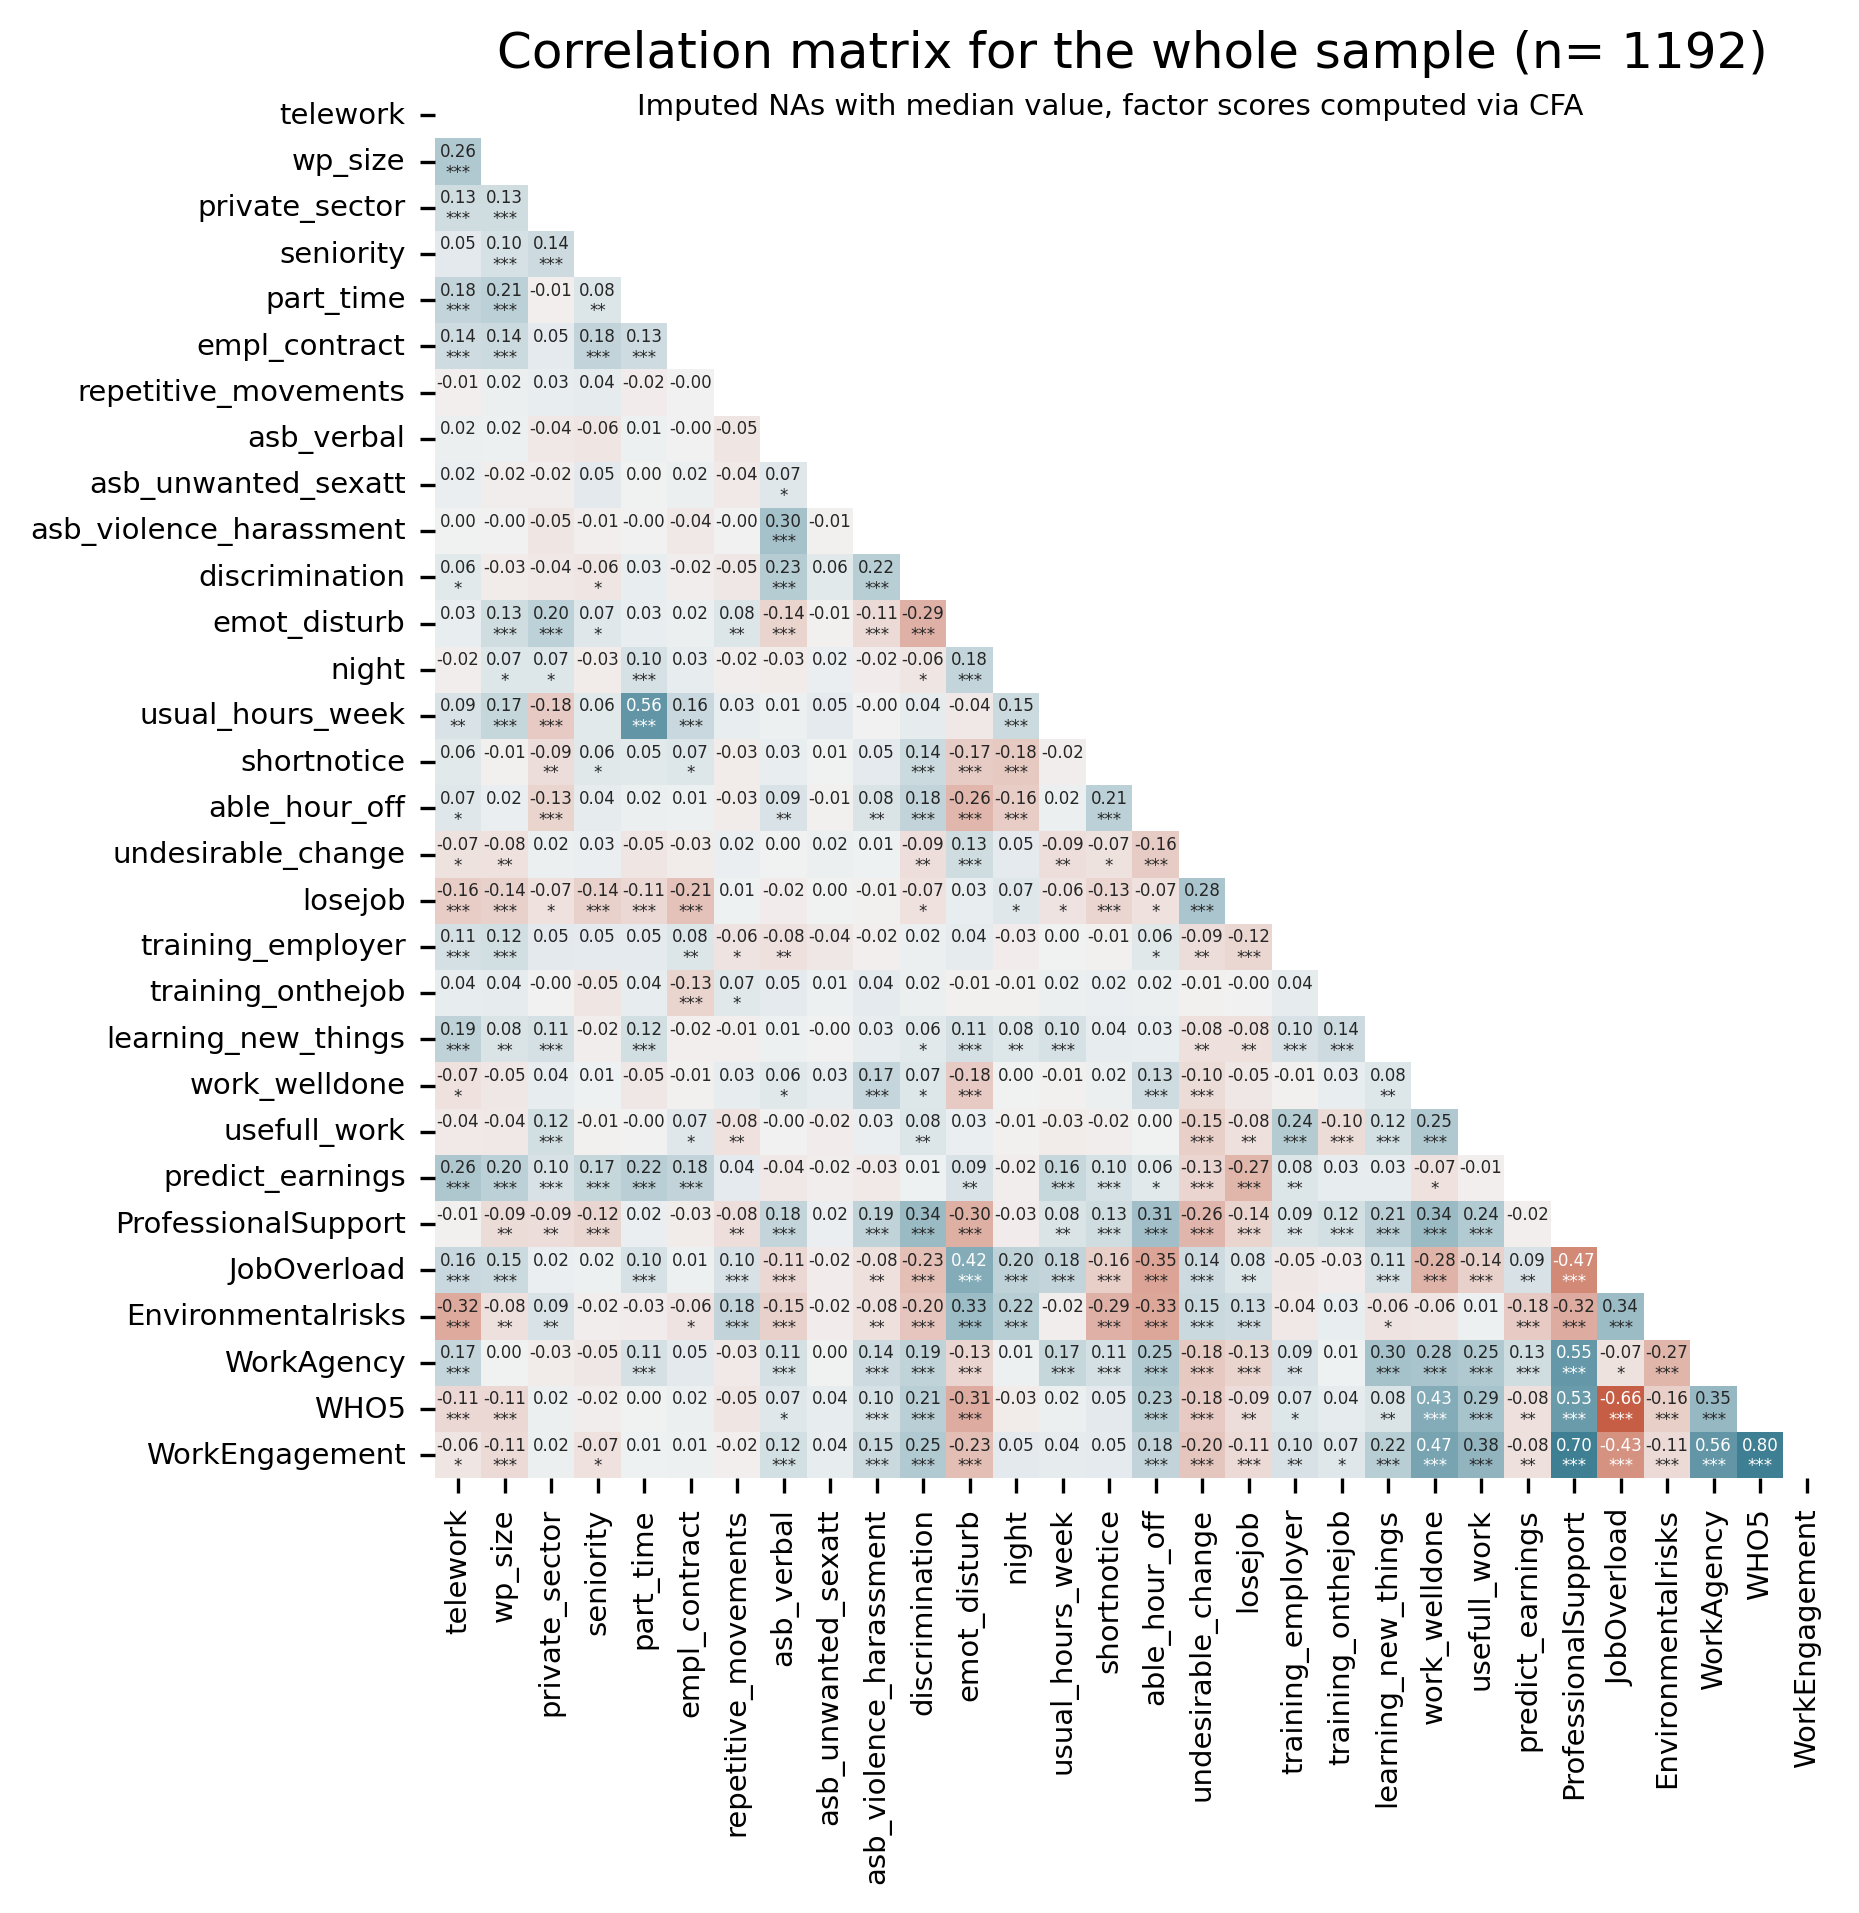

In [5]:

# Compute p-value matrix
def compute_pvalues(data):
    return data.apply(lambda x: data.apply(lambda y: pearsonr(x, y)[1]))

# Function to determine significance level
def significance_asterisks(p_val):
    if p_val < 0.001:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return ''

def corr_matrix(my_data, my_dpi=300):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=my_dpi)
    
    pvalues = compute_pvalues(my_data)
    corr_values = my_data.corr()

    # Mask for upper triangle and for p-values above 0.05
    mask = np.triu(np.ones_like(corr_values, dtype=bool))
    
    # Generate a mask for the significant cells
    significance = pvalues.applymap(significance_asterisks)
    
    # Merge correlation values and significance level
    annotations = corr_values.applymap('{:.2f}'.format) + '\n' + significance

    sns.heatmap(
        corr_values,
        mask=mask,
        vmin=-0.7,
        vmax=0.7,
        cmap=sns.diverging_palette(20, 220, as_cmap=True),
        annot=annotations,
        fmt="s",
        annot_kws={"size": 4},
        cbar=False
    )
    plt.xticks(fontsize=7, rotation=90)
    plt.yticks(fontsize=7)
    return ax.get_figure()

# Assuming `merged_data_imputed` is your dataframe
corr_matrix(imputed_df, my_dpi=300)
plt.title('Correlation matrix for the whole sample (n= 1192)')
plt.suptitle('Imputed NAs with median value, factor scores computed via CFA', fontsize=7, y=0.88)
plt.show()

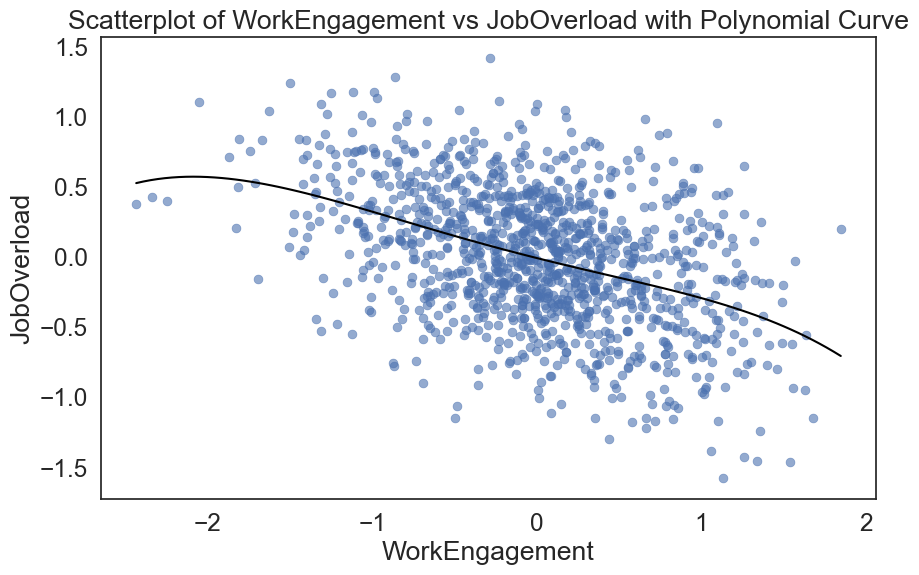

In [6]:
sns.set(style='white', font_scale=1.6)

plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='WorkEngagement', y='JobOverload', data=imputed_df, edgecolor=None, alpha=0.6, s=40)

# Fit a 4th degree polynomial regression
z = np.polyfit(imputed_df['WorkEngagement'], imputed_df['JobOverload'], deg=4)
p = np.poly1d(z)

# Generate curve values
x_curve = np.linspace(imputed_df['WorkEngagement'].min(), imputed_df['WorkEngagement'].max(), 100)
y_curve = p(x_curve)

# Overlay polynomial curve
plt.plot(x_curve, y_curve, color='black', label="Polynomial Curve")
plt.title("Scatterplot of WorkEngagement vs JobOverload with Polynomial Curve")
plt.show()

In [7]:
def corrdot(*args, **kwargs):
    corr_r, p_value = pearsonr(args[0], args[1])
    
    # Determine the string representation for p-value significance
    if p_value < 0.001:
        p_str = '***'
    elif p_value < 0.01:
        p_str = '**'
    elif p_value < 0.05:
        p_str = '*'
    else:
        p_str = ''
    
    corr_text = f"{corr_r:2.2f}\n{p_str}".replace("0.", ".")  # Use newline to position asterisks below
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    
    # Adjust the font size for better display
    font_size = abs(corr_r) * 30 + 12
    ax.annotate(corr_text, [.5, .45], xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
                
def sized_regplot(x, y, **kwargs):
    data = pd.DataFrame({'x': x, 'y': y})
    counts = data.groupby(['x', 'y']).size().reset_index(name='counts')
    data = data.merge(counts, on=['x', 'y'], how='left')
    sizes = data['counts'].values
    sns.regplot(x=x, y=y, scatter_kws={'s': sizes, 'alpha':0.5}, lowess=False, ci=None, **kwargs)

In [8]:
reversedf = pd.read_csv("data\\processed\\df_reversed.csv")
ega_dimensions = pd.read_csv('data\\EGAdimensions.csv', sep=';')
dimensions=np.unique(ega_dimensions['EGA_dimension'])

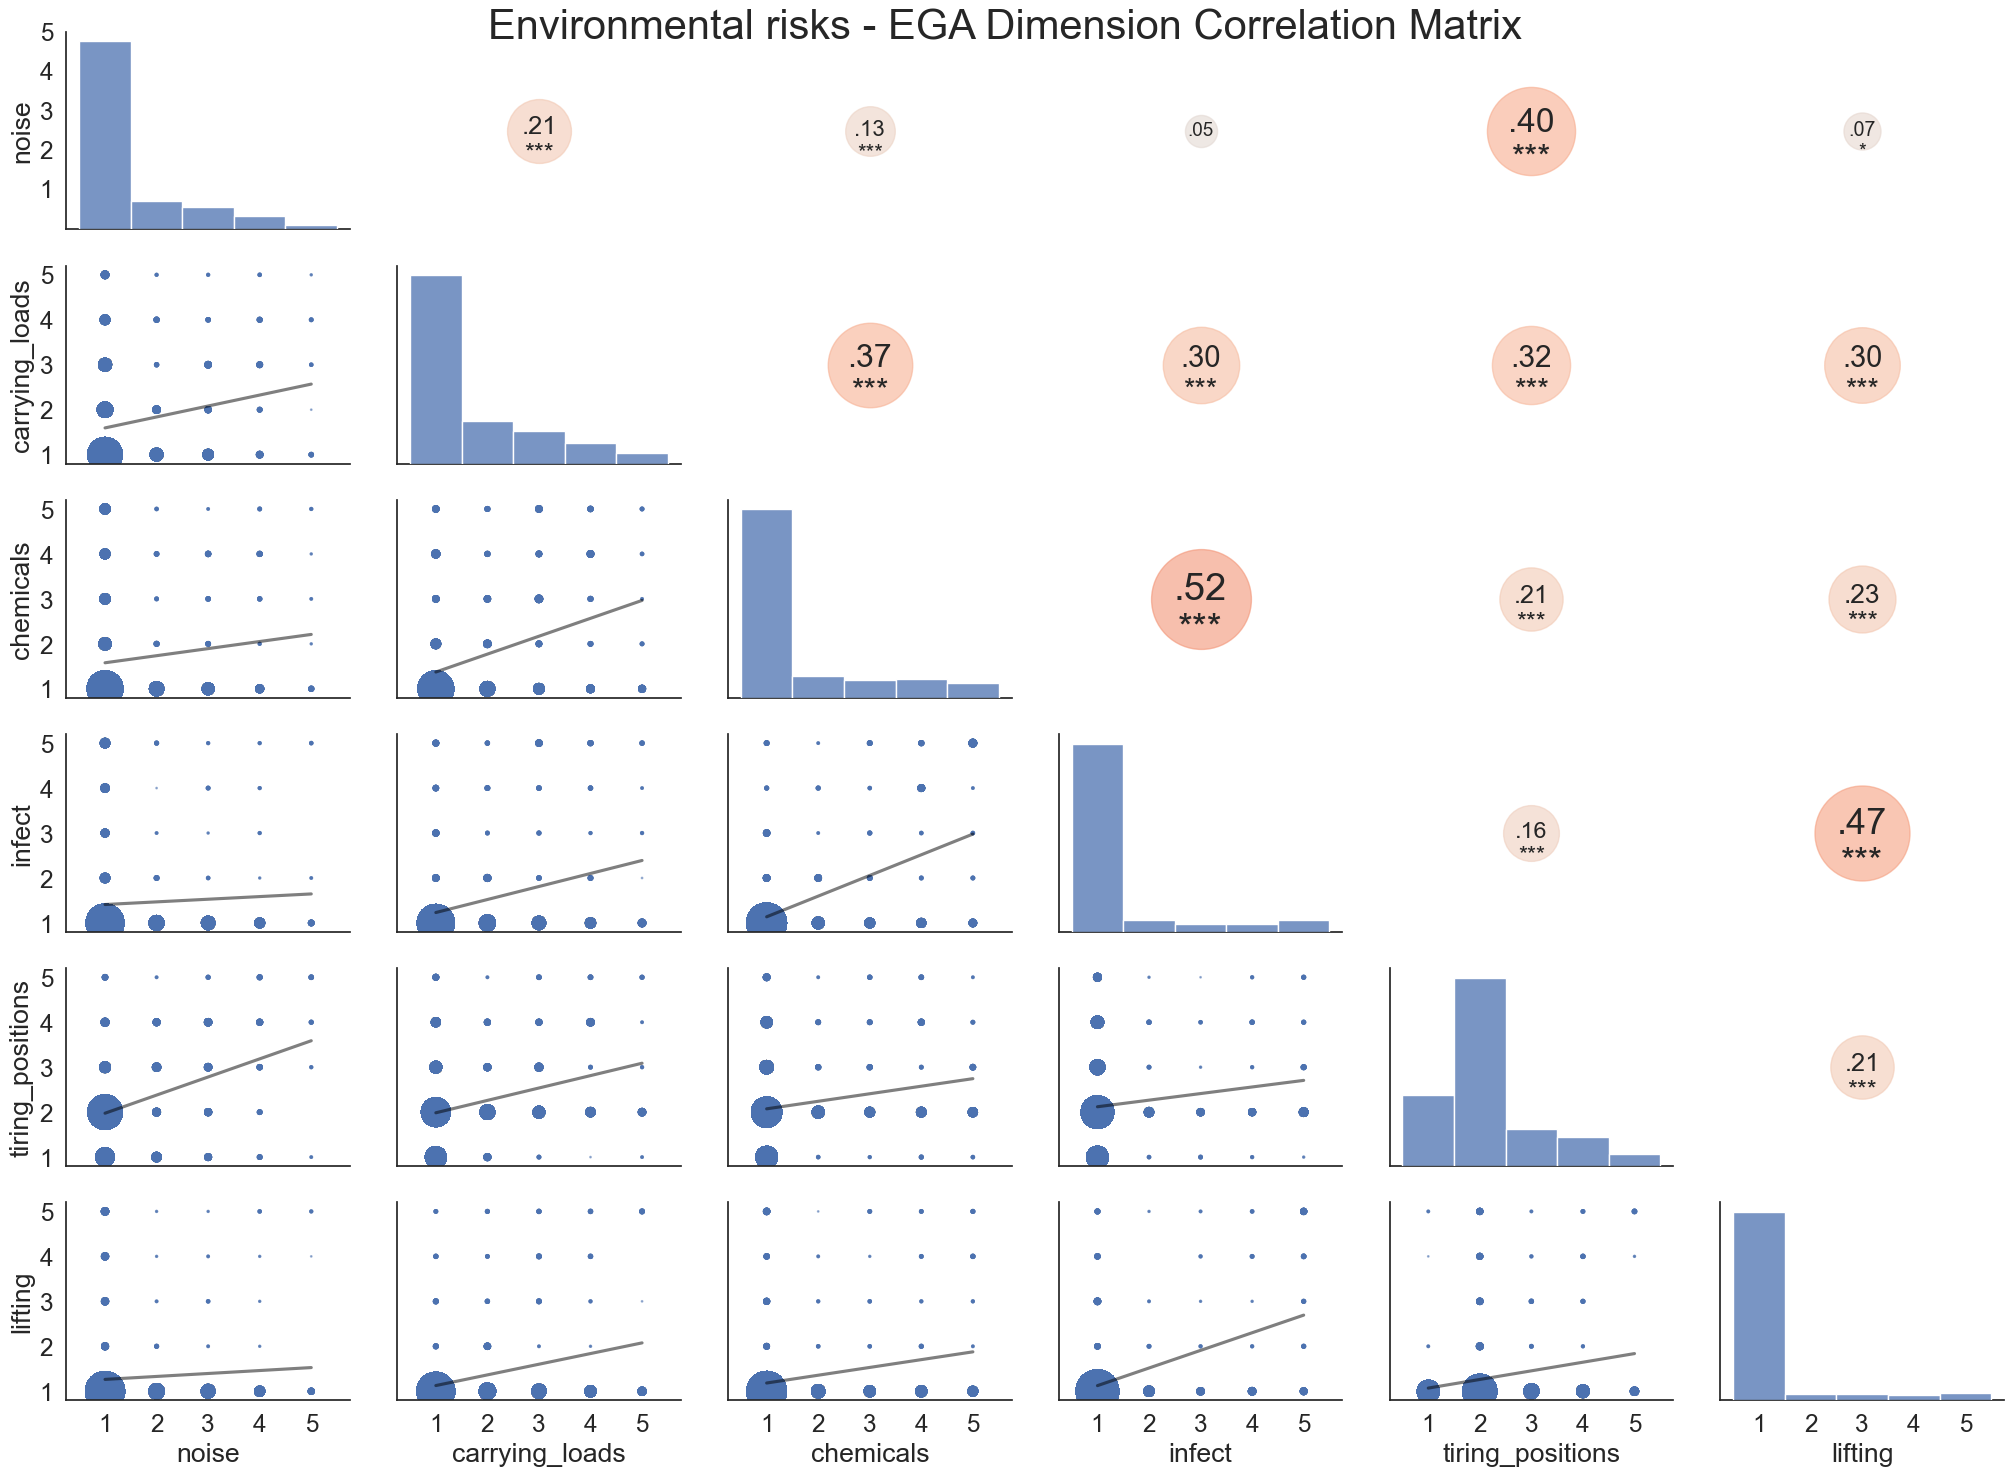

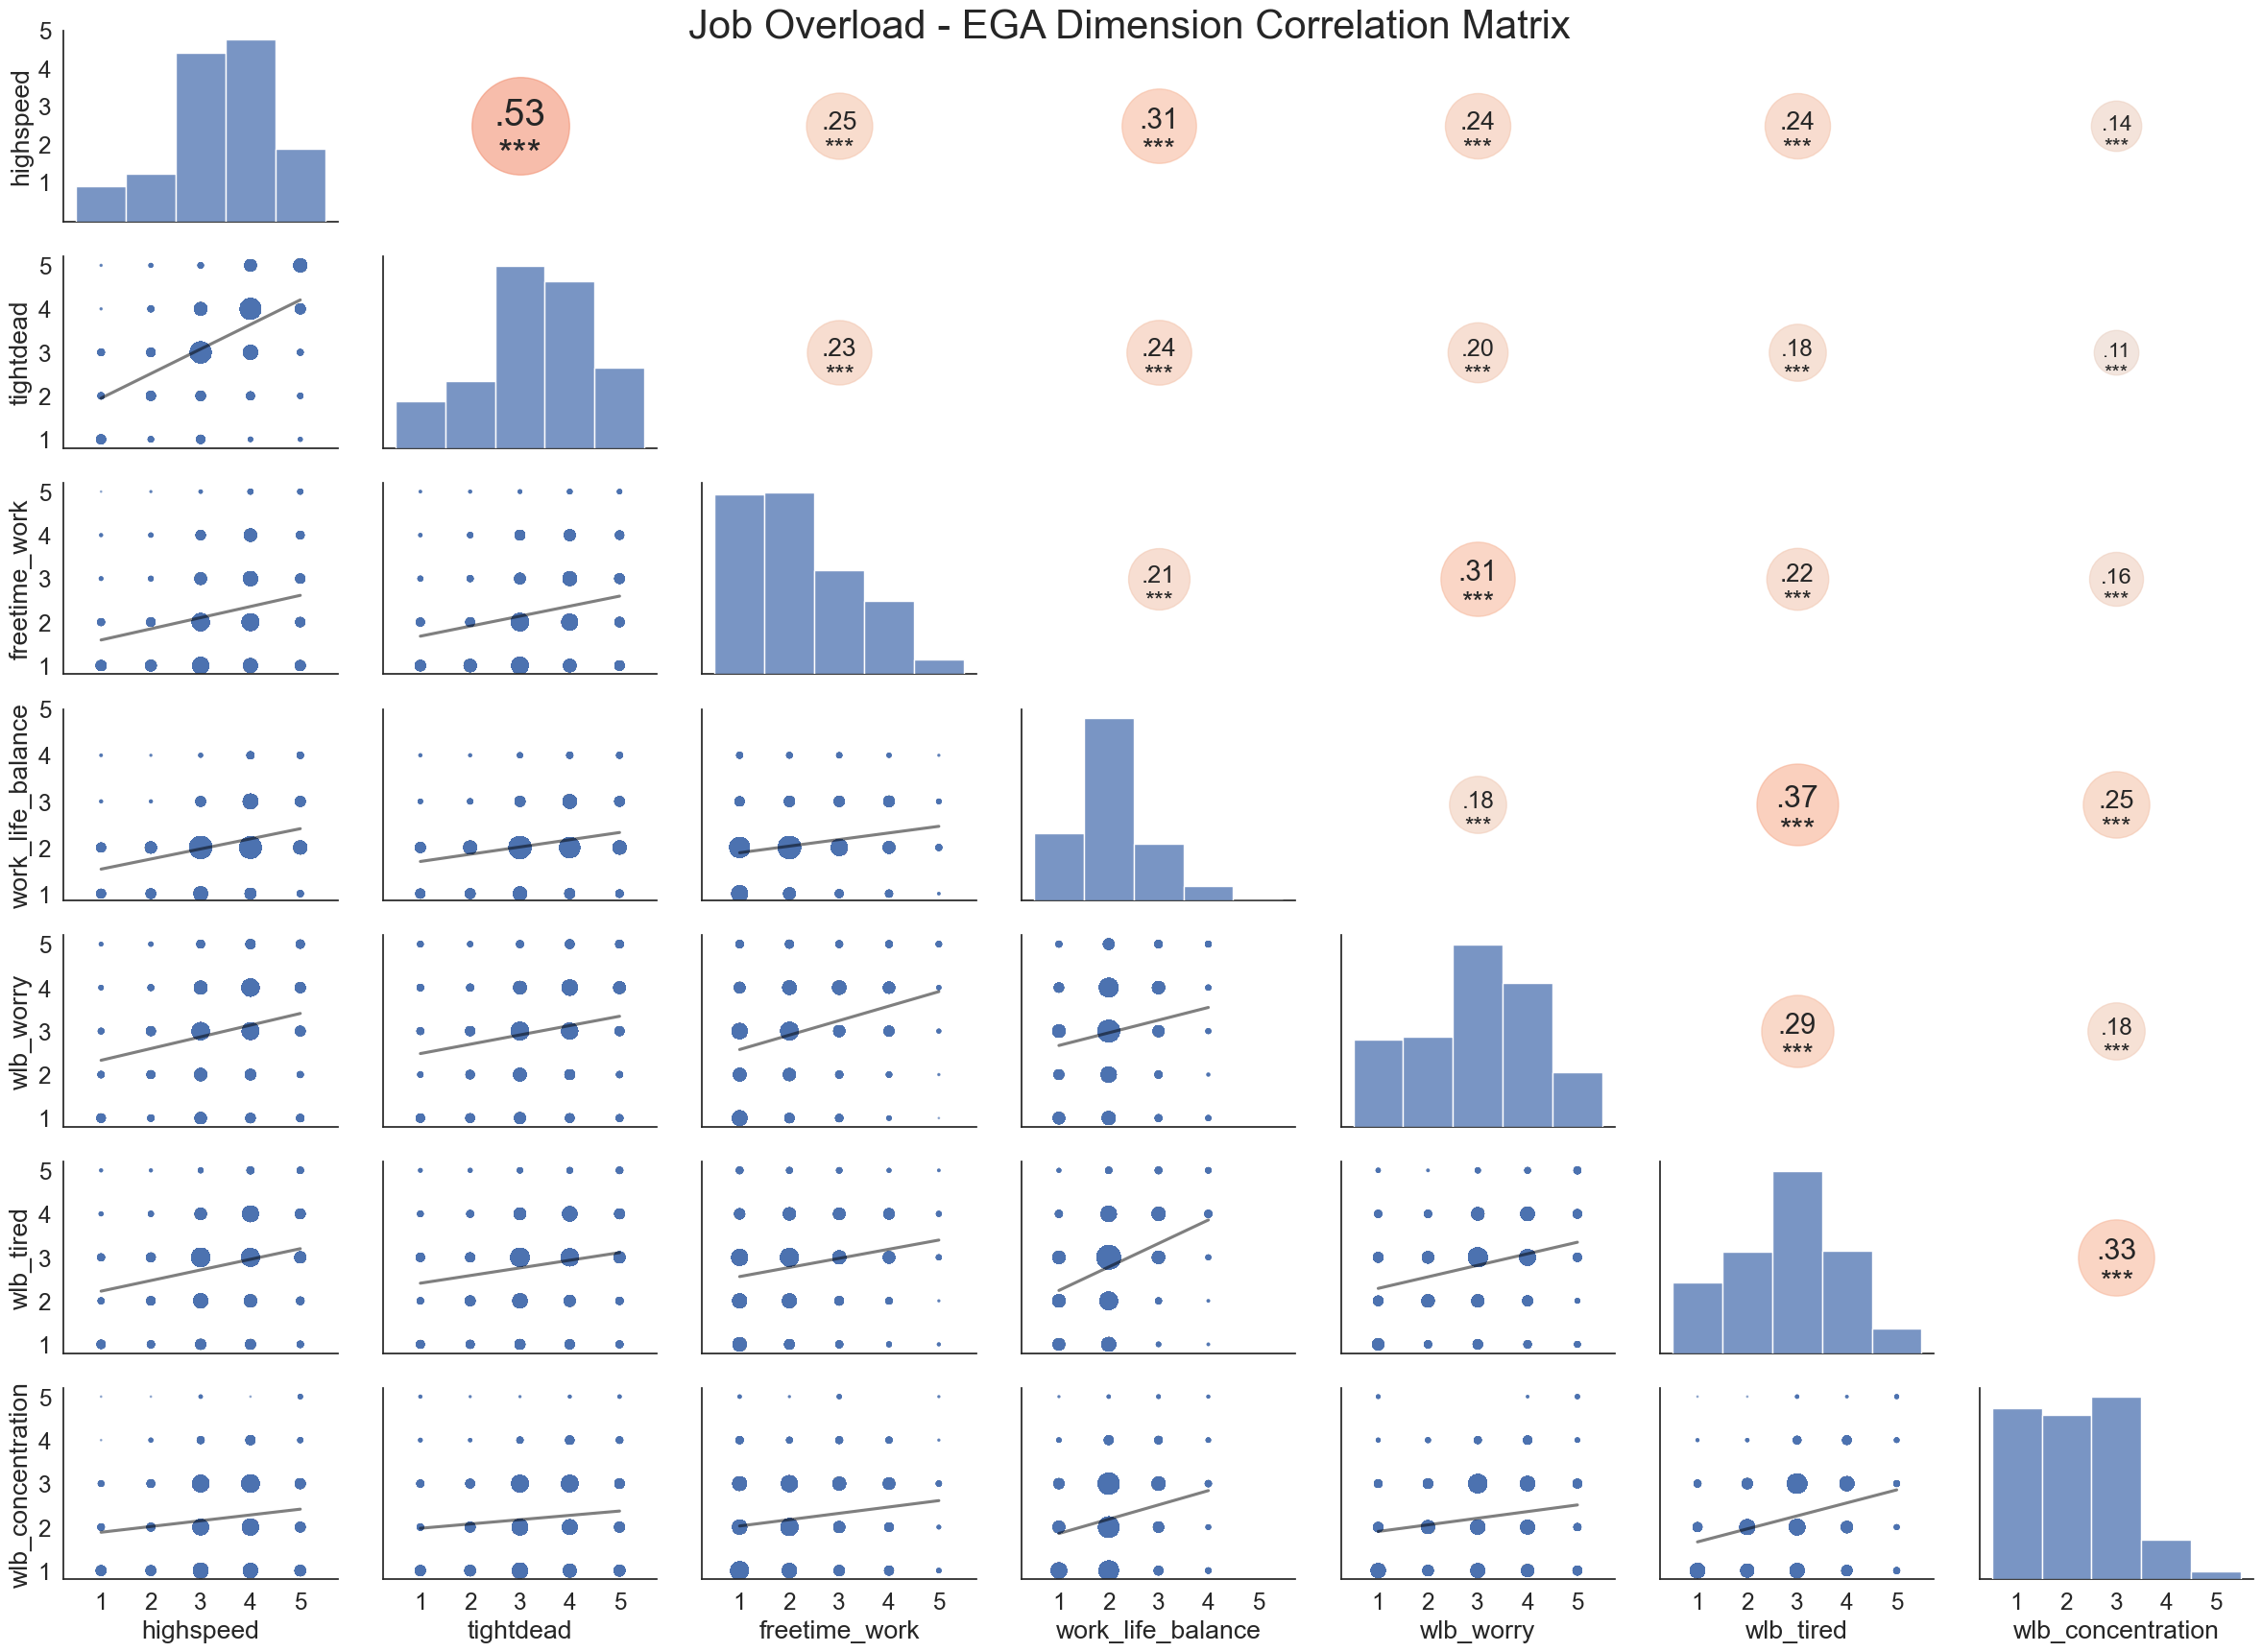

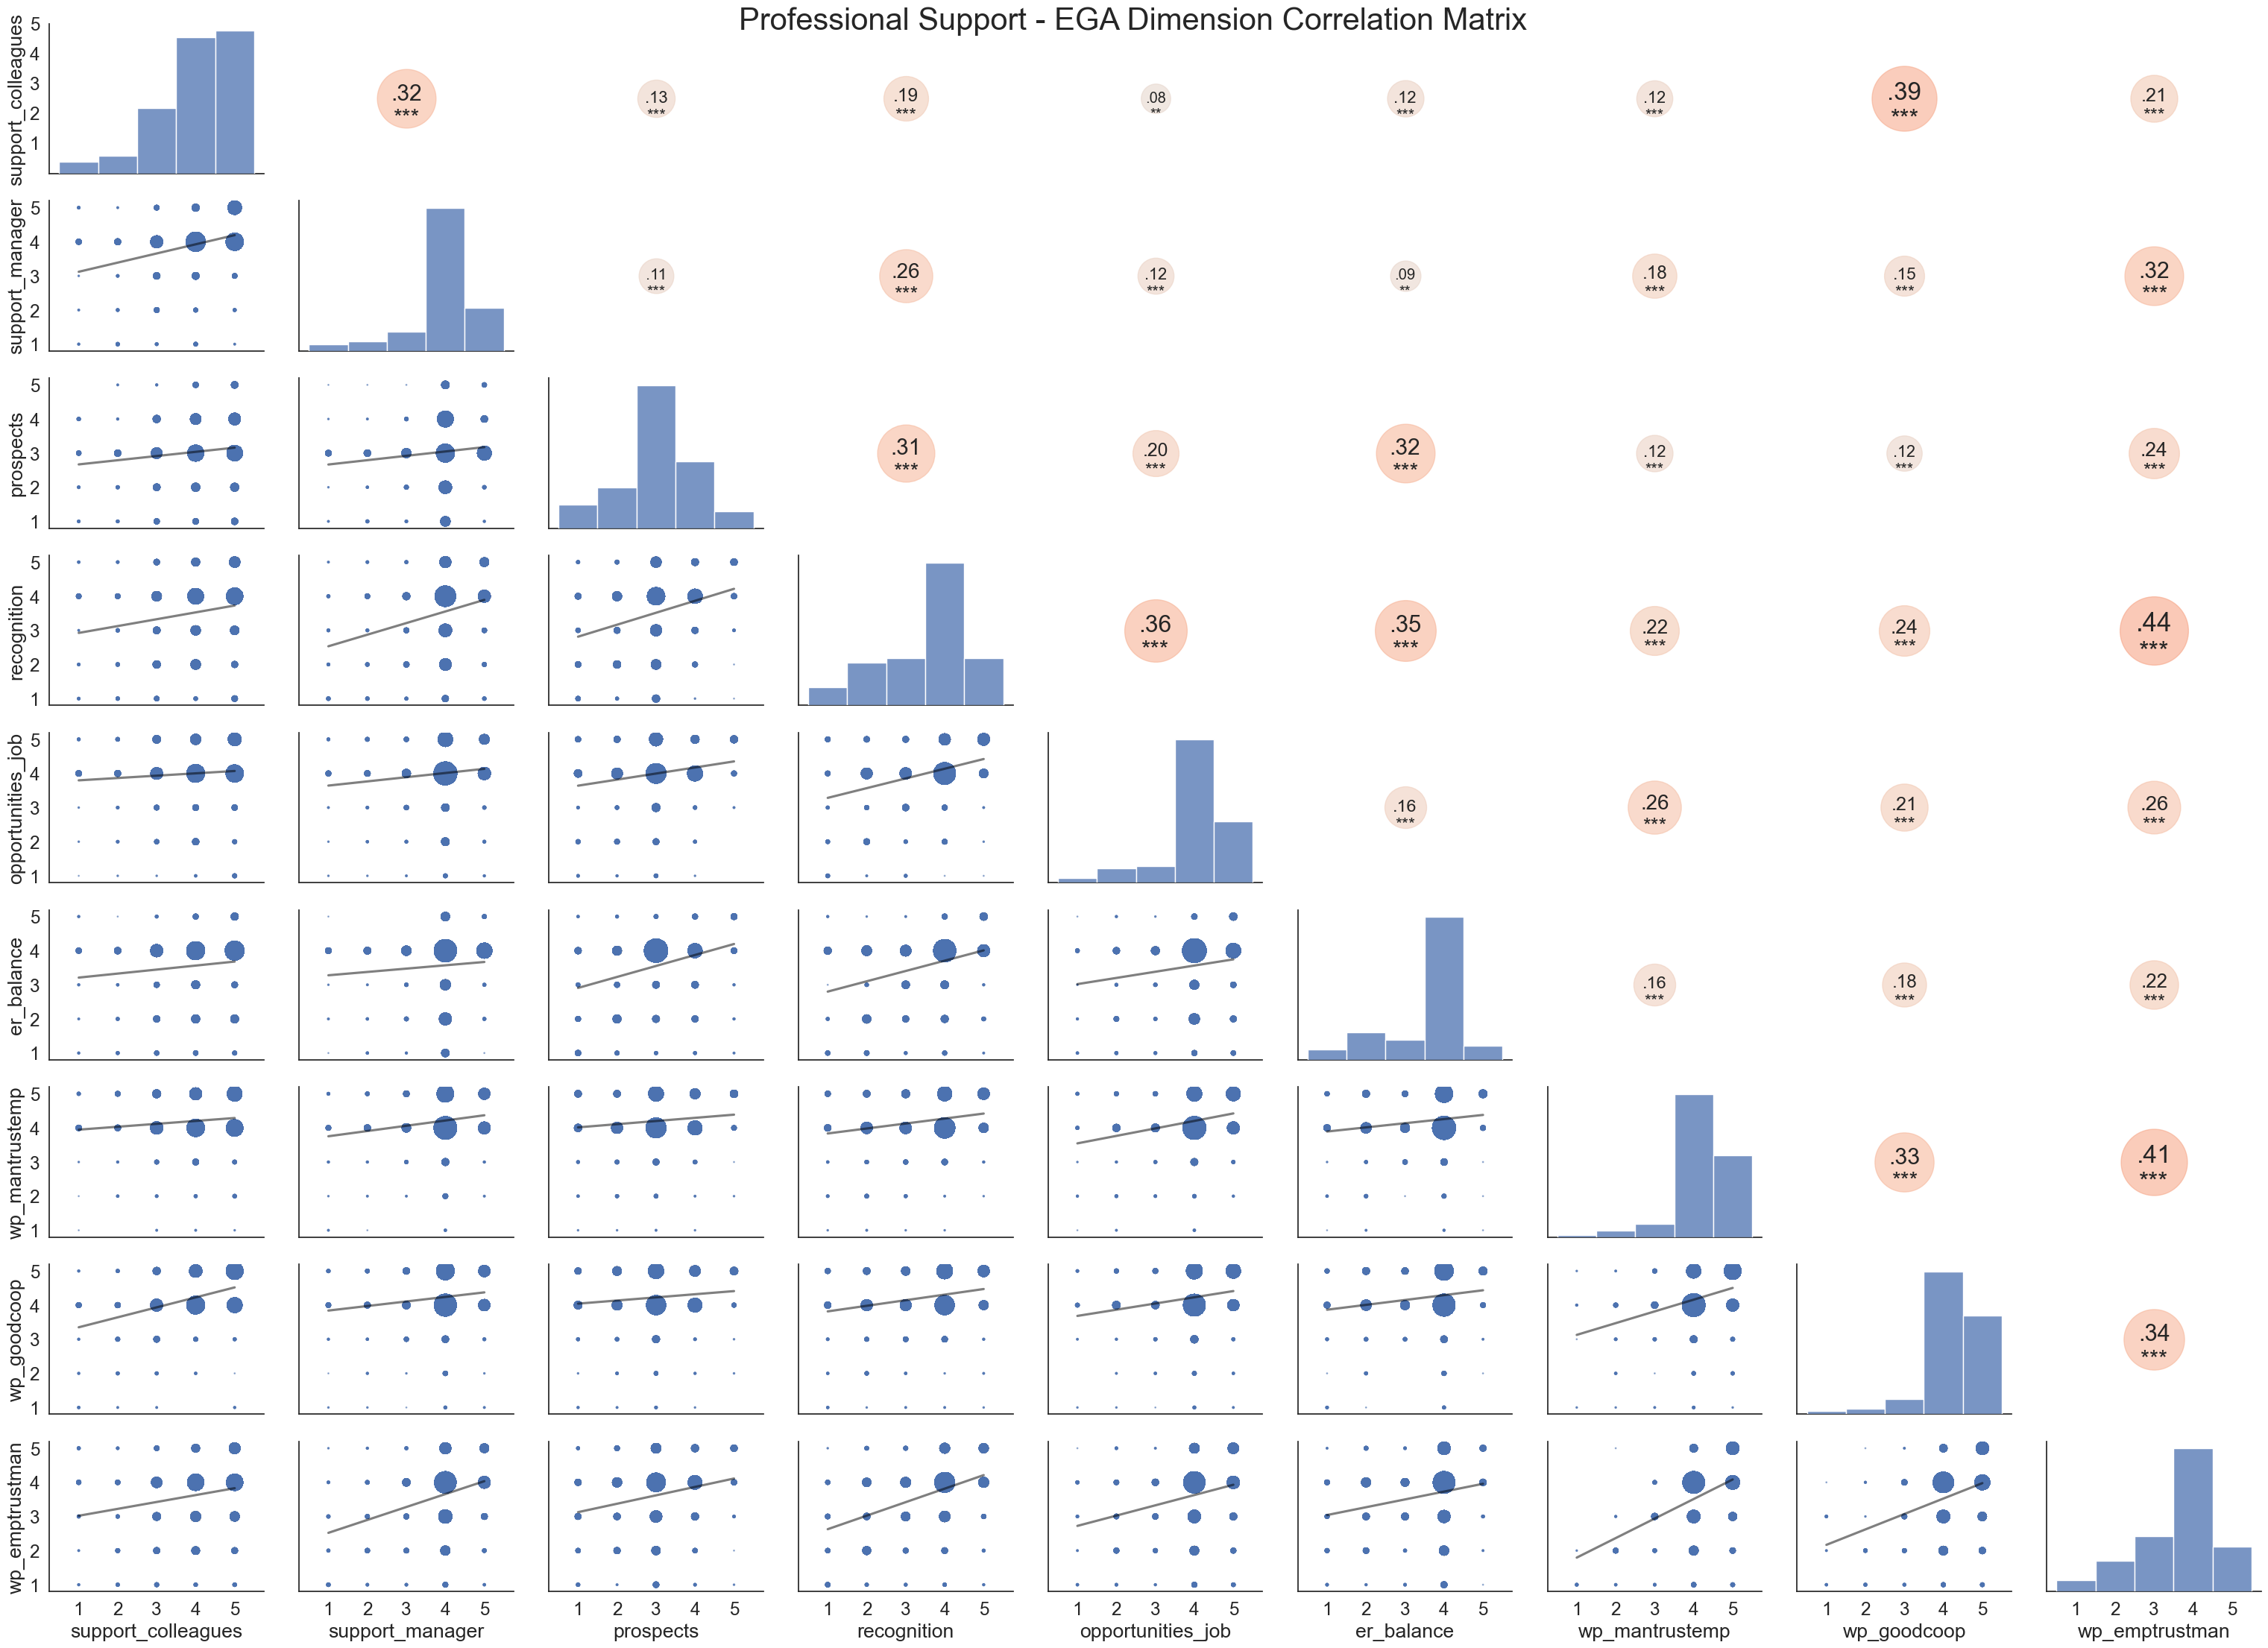

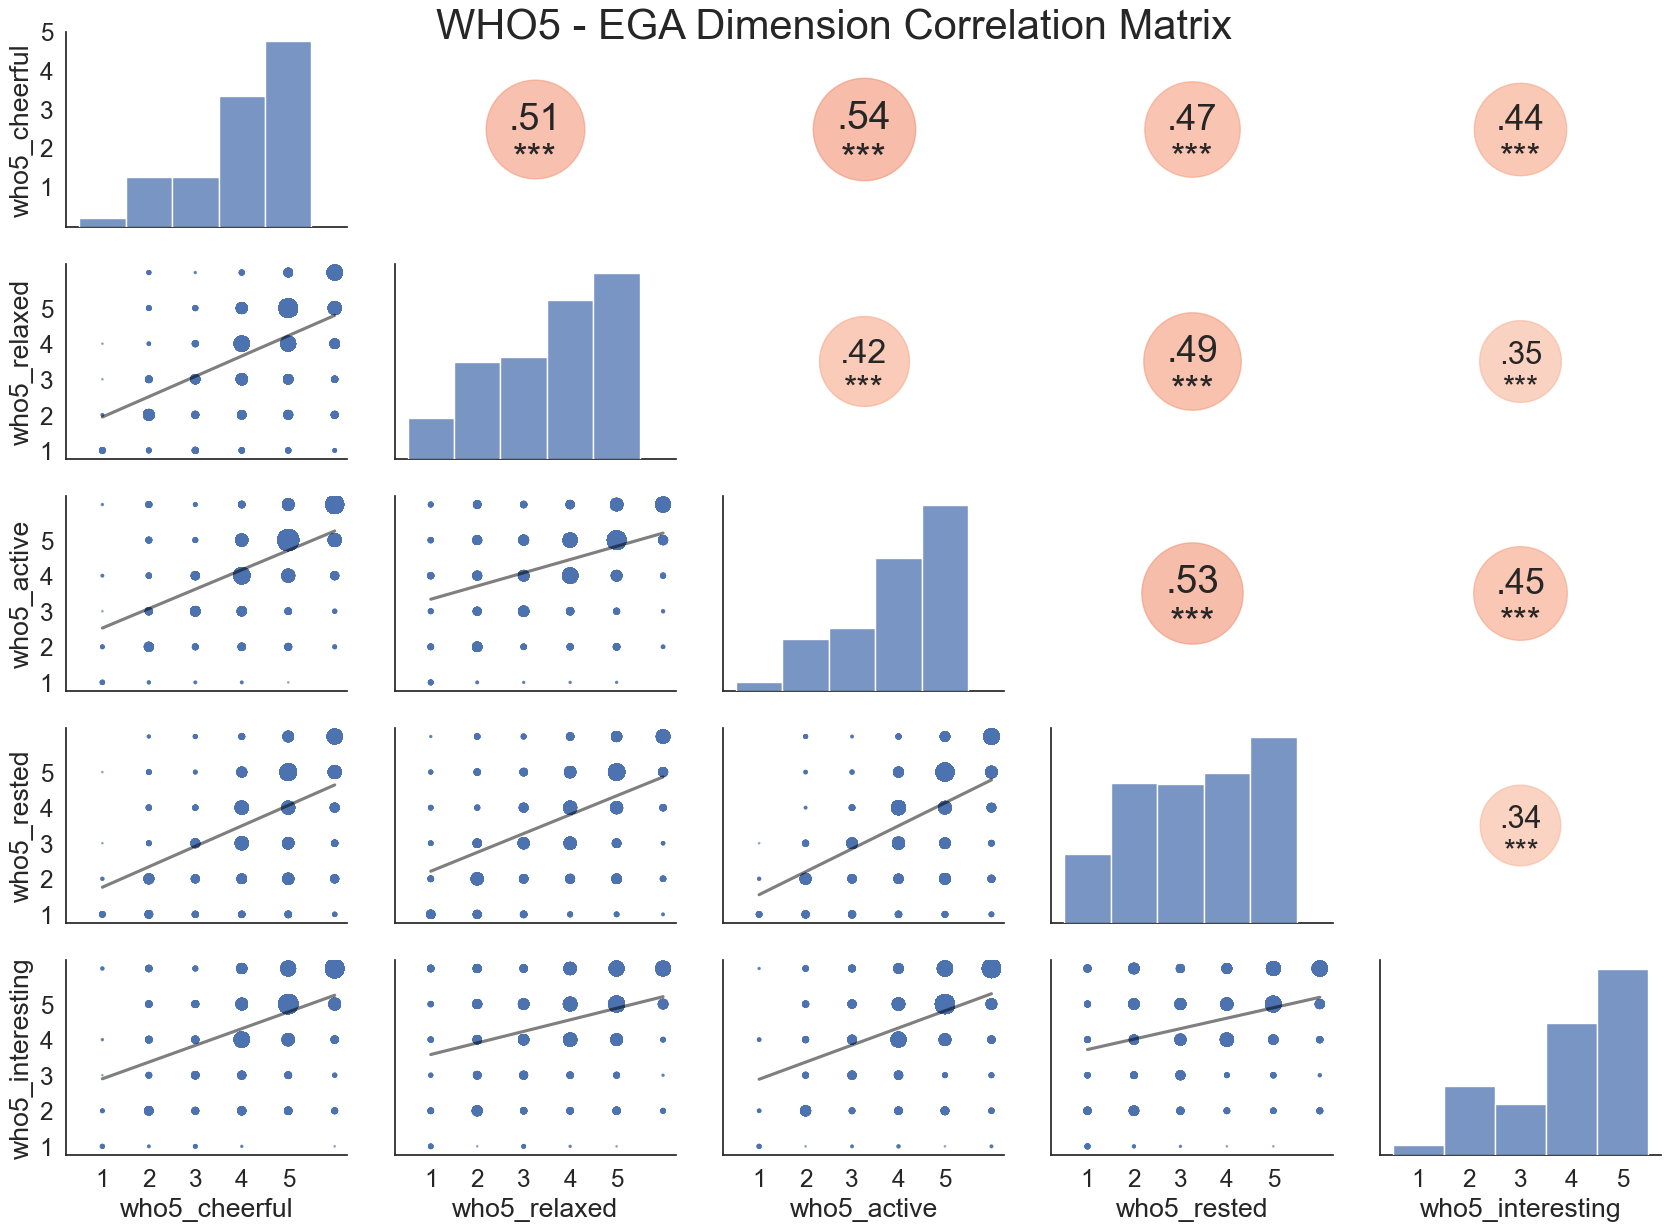

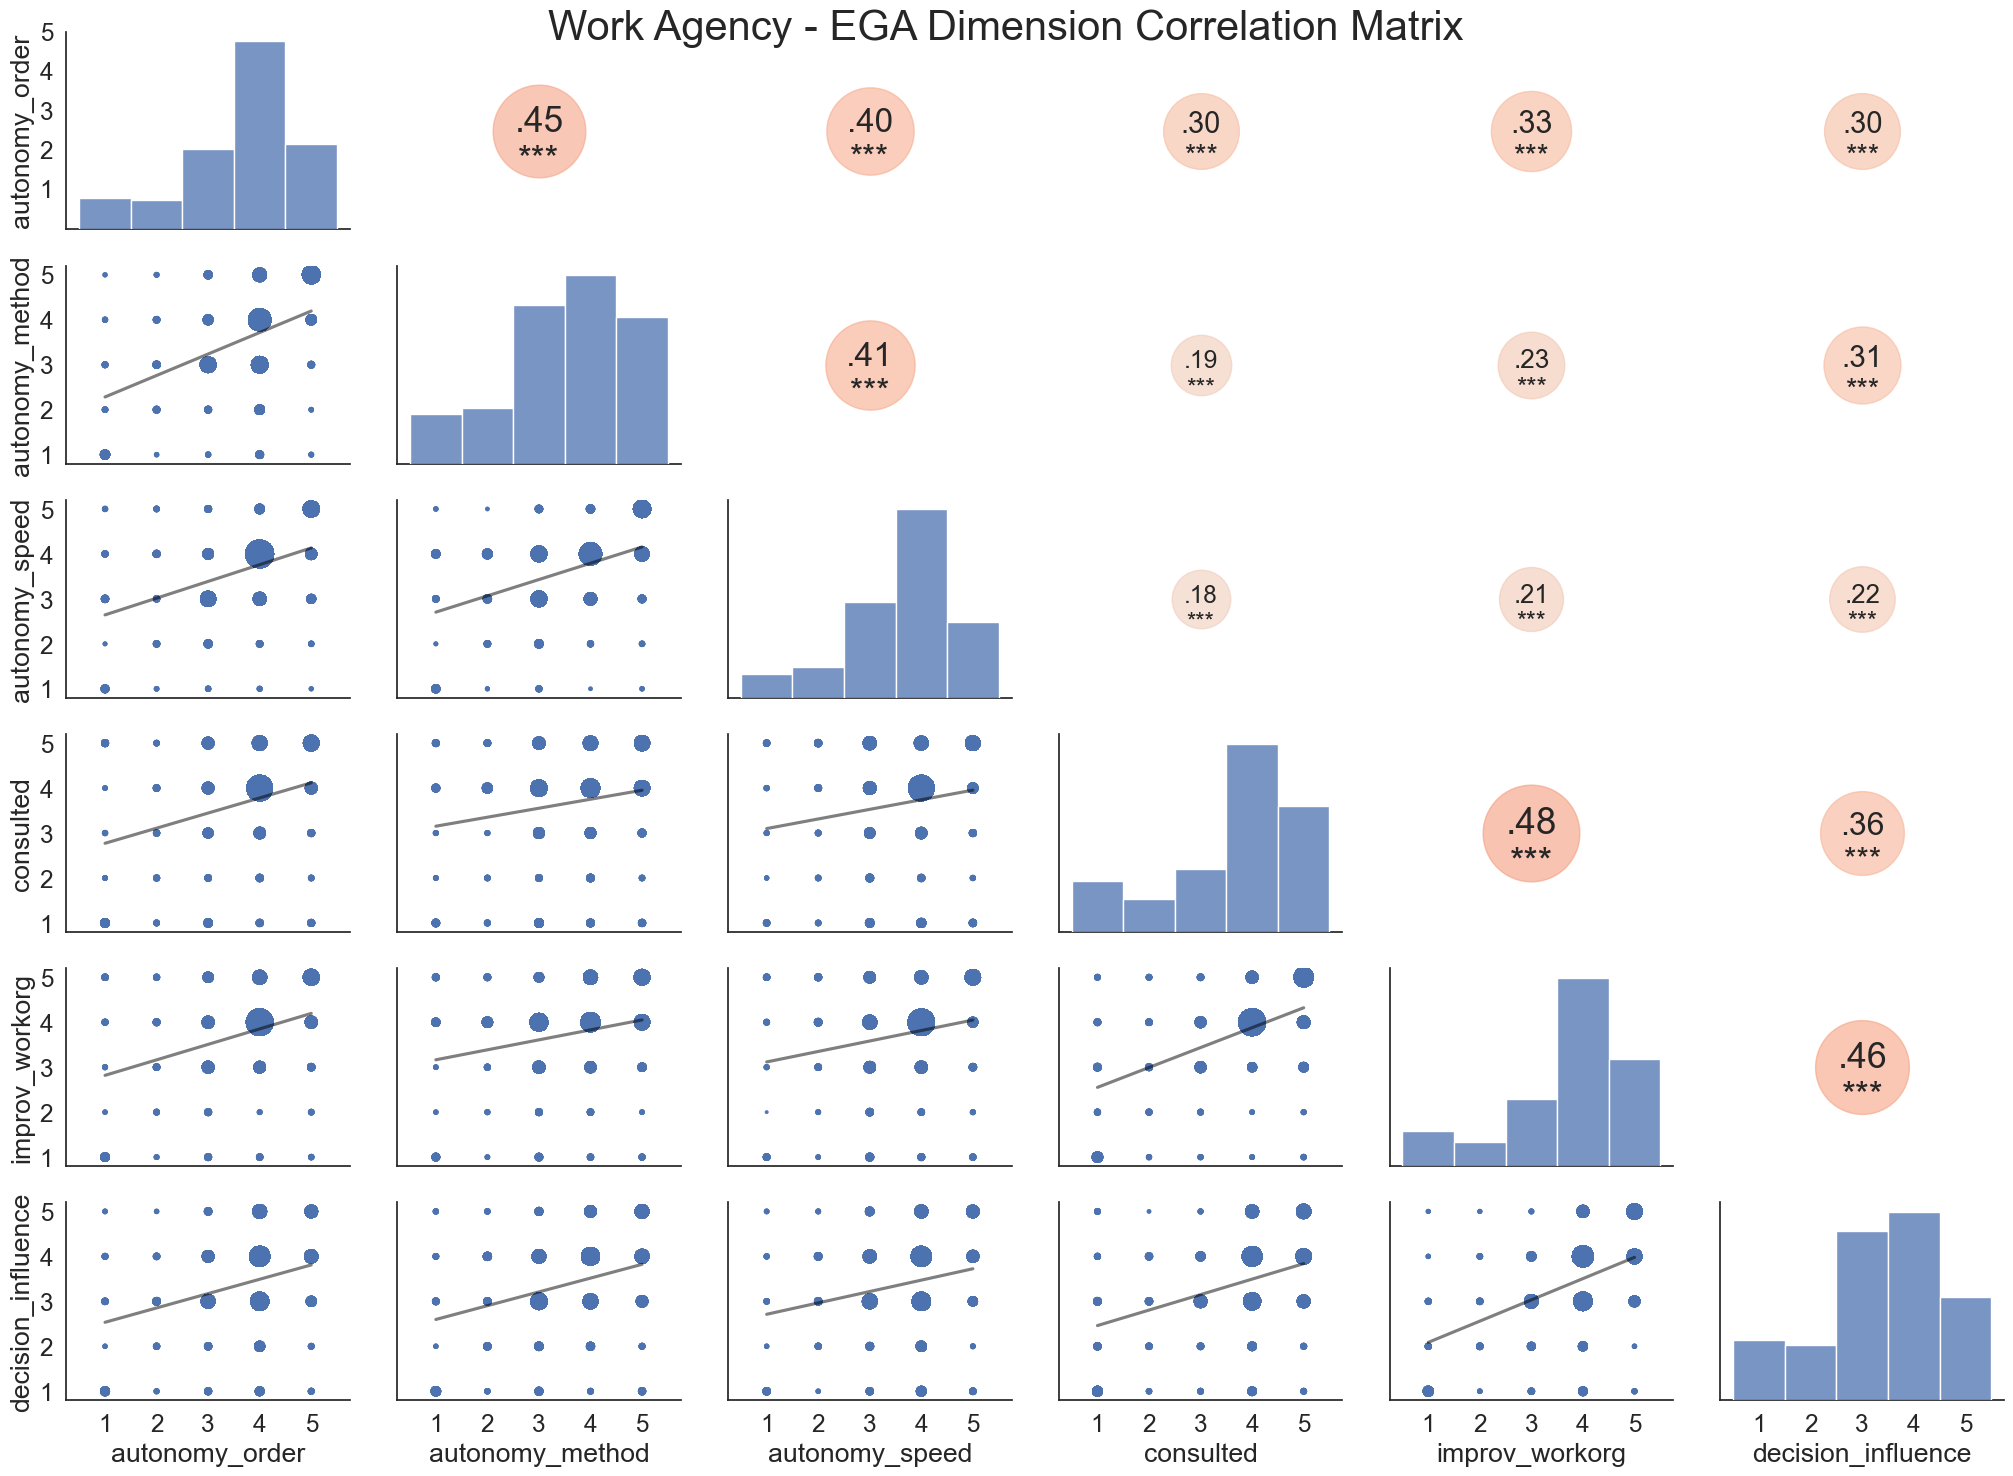

In [9]:
for dimension in np.unique(ega_dimensions['EGA_dimension']):
    dimtoplot = ega_dimensions[ega_dimensions['EGA_dimension'] == dimension]
    columns_to_select = dimtoplot['names'].tolist()

    dimdf = reversedf[columns_to_select]

    dimdf = median_impute(dimdf)

    g = sns.PairGrid(dimdf, aspect=1.4, diag_sharey=False)

    g.map_lower(sized_regplot, line_kws={'color': 'black', 'alpha': 0.5})
    g.map_diag(sns.histplot, bins=np.arange(0.5, 6.5, 1), stat="density")
    g.map_upper(corrdot)
    for ax in np.diag(g.axes):
        ax.set_xticks(np.arange(1, 6))
        ax.set_yticks(np.arange(1, 6))

    g.fig.suptitle(f"{dimension} - EGA Dimension Correlation Matrix", y=0.99, fontsize=30)
    plt.show()


